In [29]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

tf.config.set_visible_devices([], 'GPU')

data = pd.read_csv('train.csv')

In [87]:
from keras.utils import to_categorical

x_train = (data.iloc[:,1:].values).astype('float32')
y_train = data.iloc[:,0].values.astype('int32')

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
y_train= to_categorical(y_train)

print(x_train.shape)
print(y_train.shape[1])

(42000, 28, 28, 1)
10


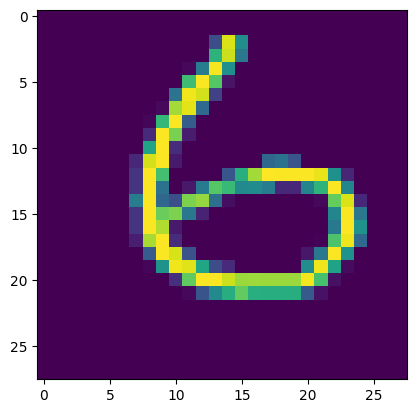

In [150]:
import matplotlib.pyplot as plt 
import random


rand = random.randrange(0, x_train.shape[0])

plt.imshow(x_train[rand][:,:,0])

In [96]:
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import MaxPooling2D
from keras.layers import Conv2D

def CNN():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
    # model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
    #              activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    
    return model

model = CNN()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2)

seed = 42

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.1, random_state=seed)
datagen.fit(x_train)

In [98]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(x_train, y_train,
         batch_size=8, subset='validation'),
         batch_size=86, epochs=24, verbose=1)

Epoch 1/24
 31/945 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1629 - loss: 2.2896 

/usr/local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


945/945 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7524 - loss: 0.7425 - val_accuracy: 0.9693 - val_loss: 0.0934
Epoch 2/24
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9542 - loss: 0.1503 - val_accuracy: 0.9824 - val_loss: 0.0563
Epoch 3/24
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9651 - loss: 0.1146 - val_accuracy: 0.9824 - val_loss: 0.0544
Epoch 4/24
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9737 - loss: 0.0894 - val_accuracy: 0.9848 - val_loss: 0.0490
Epoch 5/24
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9751 - loss: 0.0840 - val_accuracy: 0.9876 - val_loss: 0.0384
Epoch 6/24
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9747 - loss: 0.0814 - val_accuracy: 0.9897 - val_loss: 0.0340
Epoch 7/24
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9775 - loss: 0.0756 - val_accuracy: 0.9869 - val_loss: 0.0460
Epoch 8/24
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9790 - loss: 0.0710 - val_accuracy: 0.9865 - val_

Text(0.5, 0, 'epoch')

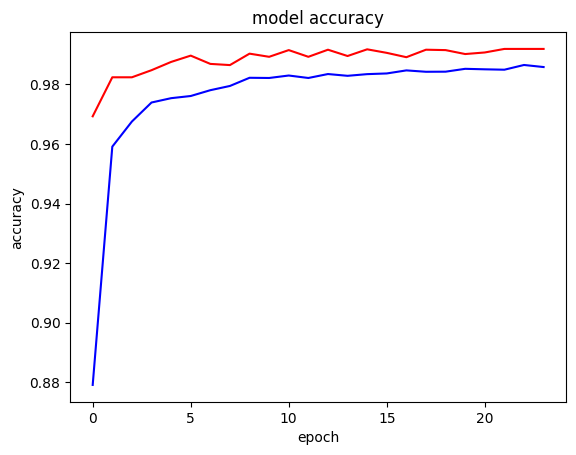

In [99]:
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

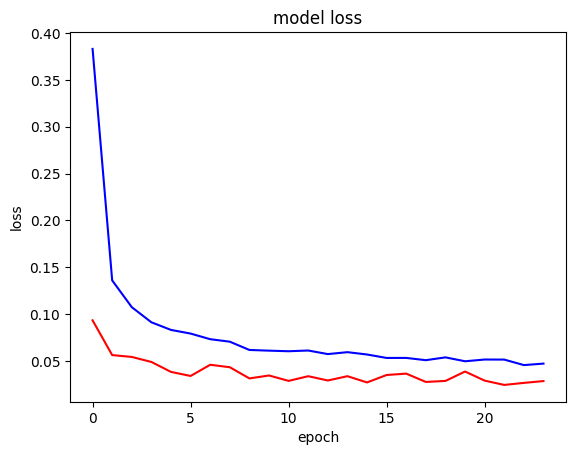

In [100]:
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [102]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9857 - loss: 3.4866
Test loss: 2.667515277862549
Test accuracy: 0.9873809814453125


In [103]:
model.save("model.keras")

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


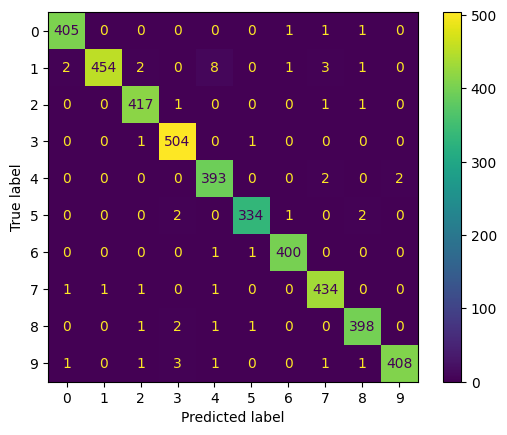

In [104]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [105]:
model = keras.models.load_model('model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


PREDICITON:  [5]


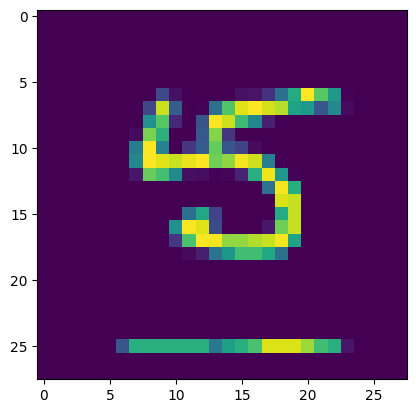

In [116]:
import matplotlib.pyplot as plt 
import numpy as np
import random

indx = random.randrange(0, len(x_train))
result = model.predict(np.array( [x_train[indx],] ))
plt.imshow(x_train[indx][:,:,0])
print("PREDICITON: ", np.argmax(result, axis=1))

1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
PREDICITON:  1
ANS:  6


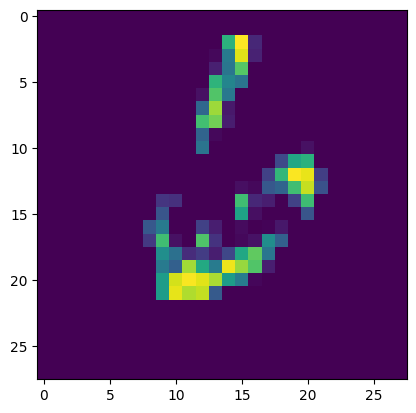

In [157]:

result = model.predict(x_train)

prediction_vec = np.argmax(result, axis=1);
ans_vec = np.argmax(y_train, axis=1);

incorrect_indices = np.where(prediction_vec != ans_vec)[0]

indx = incorrect_indices[random.randrange(0, len(incorrect_indices))]

print("PREDICITON: ", prediction_vec[indx])# Отримання прогнозів моделі
print("ANS: ", ans_vec[indx])# Отримання прогнозів моделі



plt.imshow(x_train[indx][:,:,0])
